# Tests for Portfolio VaR Functions

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.express as px
import yfinance as yf

# Import functions
import portfolio_var as pv
import plots as pl
import expected_shortfall as ES
import data_download as dd

### Asset Normal/ Undiversified VaR

**NOTE**: since we already have the parametric VaR, a Portfolio-Normal VaR function is redundant. Portfolio-Normal is exactly like parametric VaR (which we have), and that can be backtested and ES can be done (add note about that).

In [26]:
# Set parameters
confidence_level = 0.99
holding_period = 1

In [27]:
'''# Step 1: Download prices
tickers = ["^GSPC", "^STOXX50E", "^N225", "DJI", "EEM"]
data = yf.download(tickers, start="2020-01-01", end="2025-01-01")["Close"]
data = data.dropna()

# Step 2: Define fixed quantities
quantities = pd.Series([10, 80, 30, 50, -10], index=tickers)

# Step 3: Compute monetary positions
position_data = data.multiply(quantities, axis=1)'''

'# Step 1: Download prices\ntickers = ["^GSPC", "^STOXX50E", "^N225", "DJI", "EEM"]\ndata = yf.download(tickers, start="2020-01-01", end="2025-01-01")["Close"]\ndata = data.dropna()\n\n# Step 2: Define fixed quantities\nquantities = pd.Series([10, 80, 30, 50, -10], index=tickers)\n\n# Step 3: Compute monetary positions\nposition_data = data.multiply(quantities, axis=1)'

In [28]:
# Define tickers and download price data
tickers = ["MSFT", "NVDA", "AAPL"]
prices = dd.get_raw_prices(tickers, start="2024-01-01")


# Define portfolio — 3 shares of each asset
shares = pd.Series({"MSFT": 3, "NVDA": 3, "AAPL": 3})

# Compute daily value of each position
position_data = prices * shares


In [29]:
position_data.head()

,AAPL,MSFT,NVDA
Date,,,
2024-01-02,553.596268,1102.141846,144.449753
2024-01-03,549.451126,1101.339478,142.653431
2024-01-04,542.473068,1093.434448,143.939953
2024-01-05,540.296036,1092.869934,147.235691
2024-01-08,553.357635,1113.494019,156.700150


In [30]:
# Compute and display the summary
summary_df = pv.var_asset_normal(position_data)

In [31]:
summary_df.head()

,Diversified_VaR,Undiversified_VaR,Diversification_Benefit
Date,,,
2024-01-03,63.917354,75.625070,11.707717
2024-01-04,63.485699,75.143867,11.658168
2024-01-05,63.581463,75.306739,11.725276
2024-01-08,65.269045,77.421045,12.152000
2024-01-09,65.488970,77.707541,12.218571


### Marginal VaR

In [32]:
# Compute and display Marginal VaR (styled table)
marginal_df = pv.marginal_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [33]:
marginal_df.head()

,AAPL,MSFT,NVDA
Date,,,
2024-01-03,0.034910,0.033176,0.057463
2024-01-04,0.034853,0.033183,0.057633
2024-01-05,0.034798,0.033180,0.057856
2024-01-08,0.034766,0.033146,0.058220
2024-01-09,0.034712,0.033151,0.058375


### Incremental, Component and Relative Component VaR

In [34]:
# Compute and display Component VaR (styled table)
component_df = pv.component_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)

In [35]:
component_df.head()

,AAPL,MSFT,NVDA
Date,,,
2024-01-03,19.181436,36.538576,8.197342
2024-01-04,18.906602,36.283353,8.295744
2024-01-05,18.801097,36.261938,8.518428
2024-01-08,19.238284,36.907678,9.123083
2024-01-09,19.164910,37.021458,9.302602


In [36]:
rcvar_df = pv.relative_component_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [37]:
rcvar_df.head()

,AAPL,MSFT,NVDA
Date,,,
2024-01-03,0.300097,0.571653,0.128249
2024-01-04,0.297809,0.571520,0.130671
2024-01-05,0.295701,0.570322,0.133977
2024-01-08,0.294754,0.565470,0.139777
2024-01-09,0.292643,0.565308,0.142048


In [38]:
# Define change in position
change_vector = [0, 100, 0,]  # Increase Asset_B by 100 units

# Compute and display Incremental VaR
ivar_series = pv.incremental_var(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=0.99,
    holding_period=1,
)

In [39]:
ivar_series.head()

Date
2024-01-03    3.317649
2024-01-04    3.318292
2024-01-05    3.318047
2024-01-08    3.314583
2024-01-09    3.315068
dtype: float64

# ES Test

In [40]:
# Compute and display Marginal VaR (styled table)
marginal_es_df = ES.marginal_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [41]:
marginal_es_df.head()

,AAPL,MSFT,NVDA
Date,,,
2024-01-03,0.039995,0.038009,0.065834
2024-01-04,0.039929,0.038016,0.066029
2024-01-05,0.039867,0.038014,0.066283
2024-01-08,0.039831,0.037974,0.066701
2024-01-09,0.039769,0.037980,0.066878


In [42]:
# Compute and display Component VaR (styled table)
component_es_df = ES.component_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)

In [43]:
component_es_df.head()

,AAPL,MSFT,NVDA
Date,,,
2024-01-03,21.975490,41.860950,9.391404
2024-01-04,21.660623,41.568550,9.504140
2024-01-05,21.539750,41.544016,9.759261
2024-01-08,22.040619,42.283817,10.451993
2024-01-09,21.956557,42.414171,10.657661


In [44]:
res_df = ES.relative_component_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [45]:
res_df.head()

,AAPL,MSFT,NVDA
Date,,,
2024-01-03,0.300097,0.571653,0.128249
2024-01-04,0.297809,0.571520,0.130671
2024-01-05,0.295701,0.570322,0.133977
2024-01-08,0.294754,0.565470,0.139777
2024-01-09,0.292643,0.565308,0.142048


In [46]:
# Define change in position
change_vector = [0, 100, 0,]  # Increase Asset_B by 100 units

# Compute and display Incremental VaR
ies_series = ES.incremental_es(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=0.99,
    holding_period=1,
)

In [47]:
ies_series.head()

Date
2024-01-03    3.800913
2024-01-04    3.801650
2024-01-05    3.801369
2024-01-08    3.797400
2024-01-09    3.797956
dtype: float64

### Visualizations

Here add linea tratteggiata like in the other plots to visualize interactively

In [ ]:
pl.plot_var_series(summary_df, interactive=False)


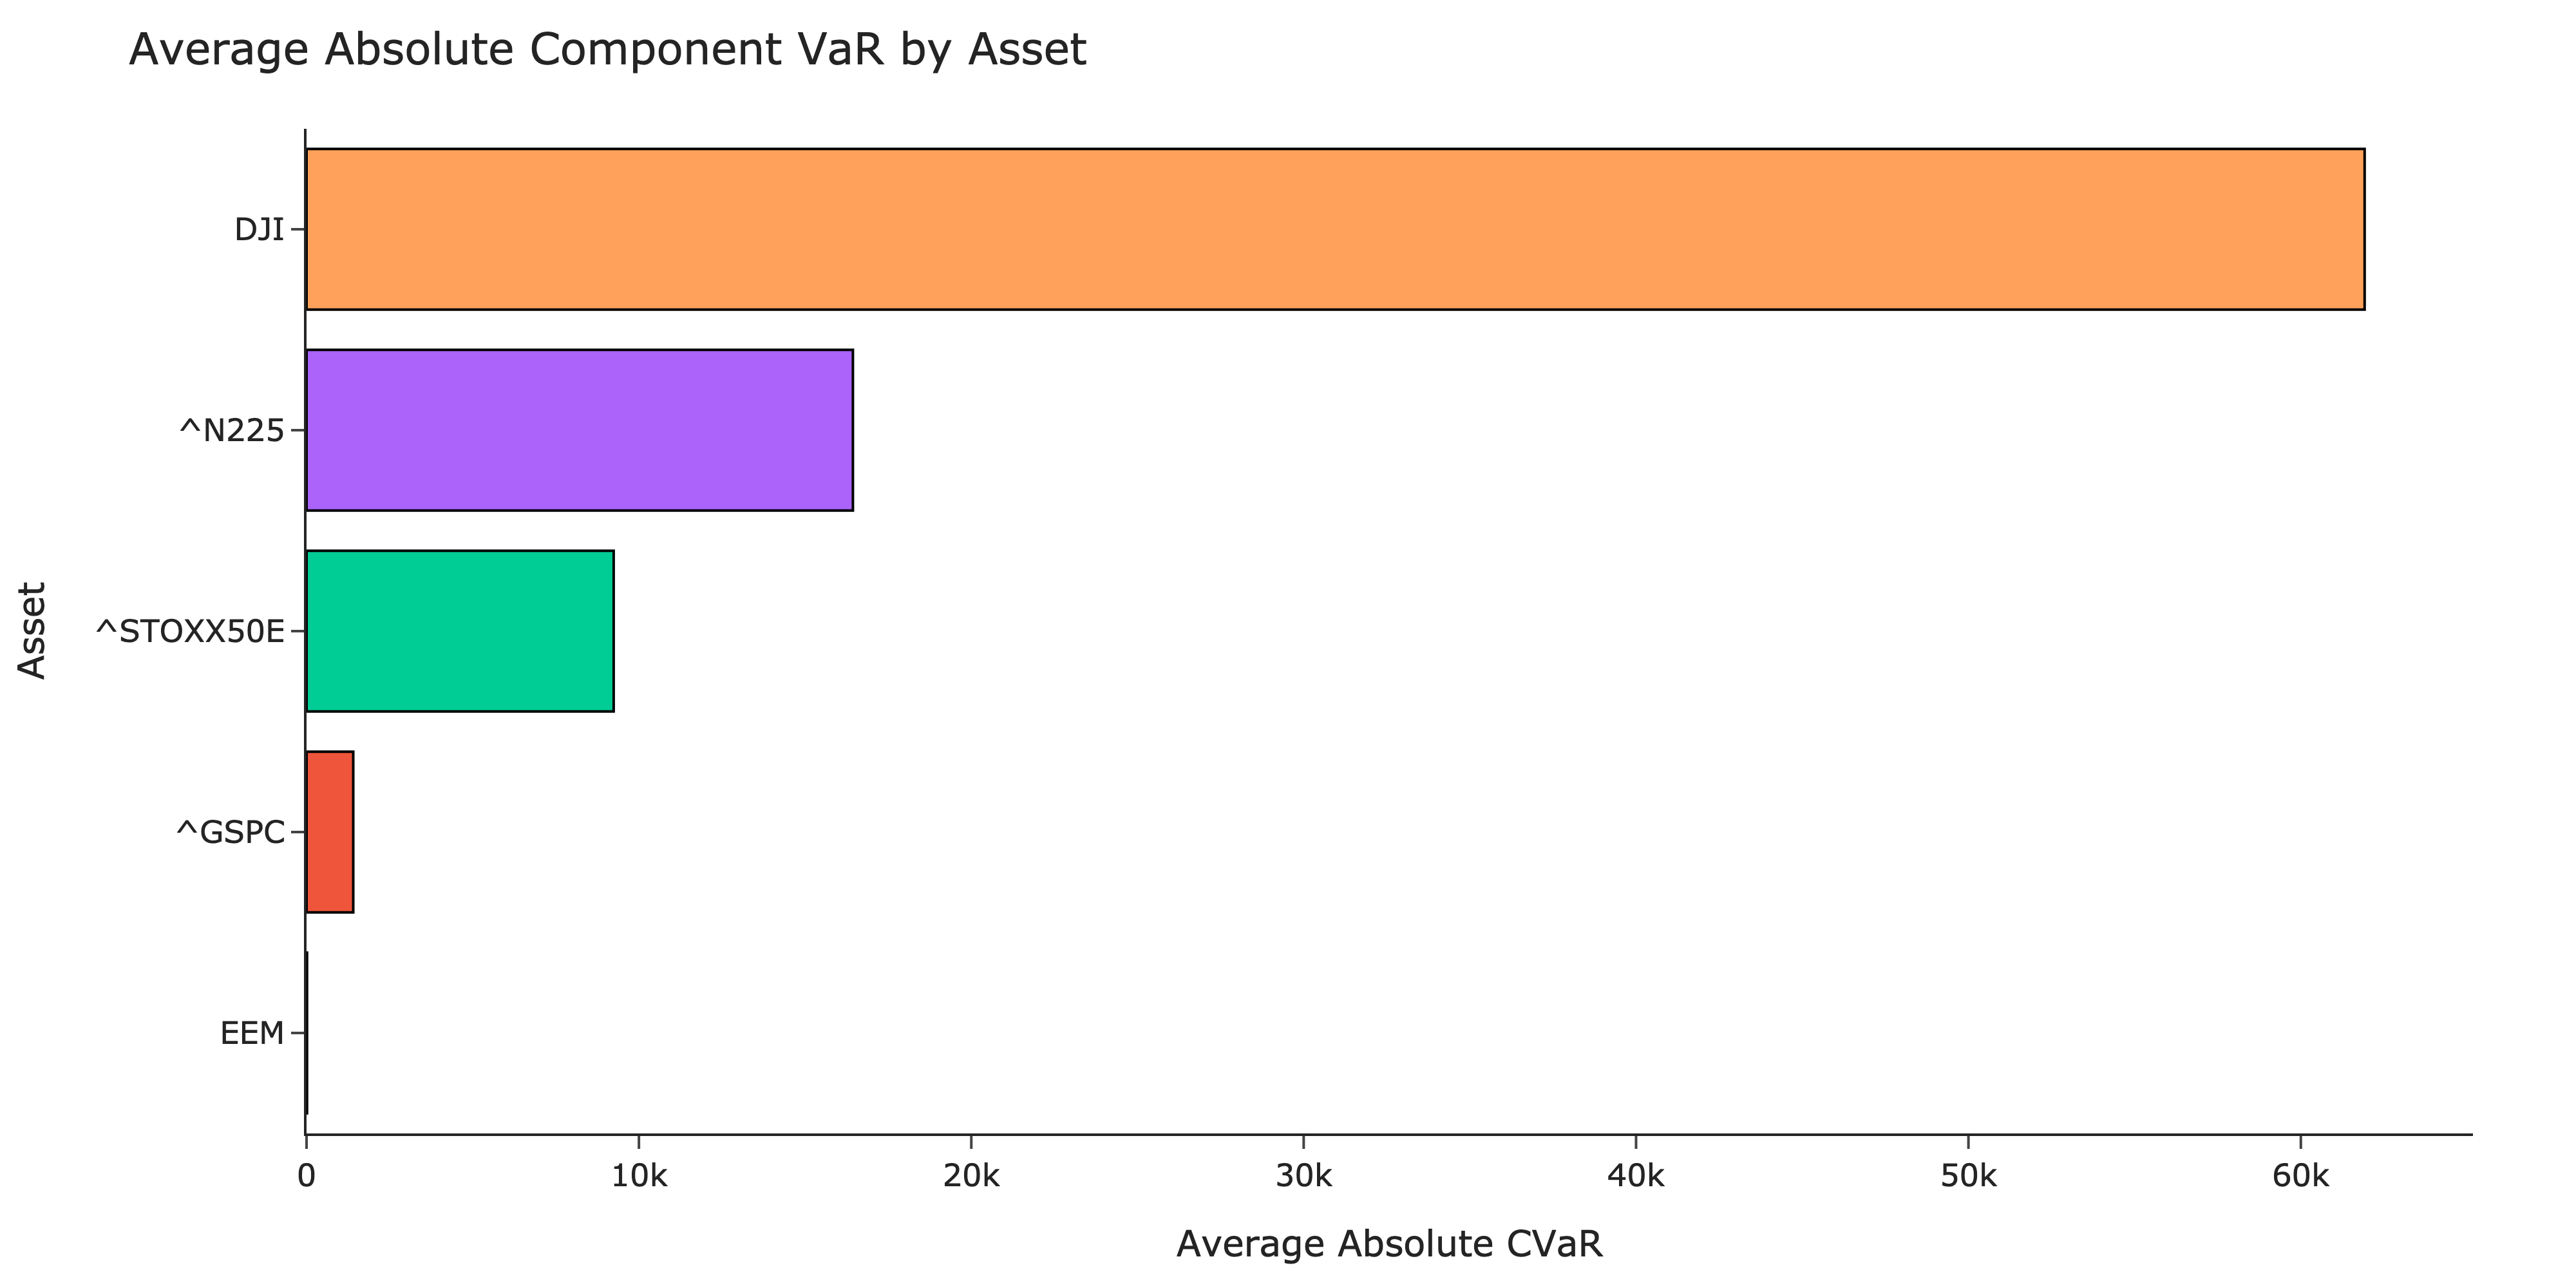

In [ ]:
pl.plot_risk_contribution_bar(component_df, interactive=False)


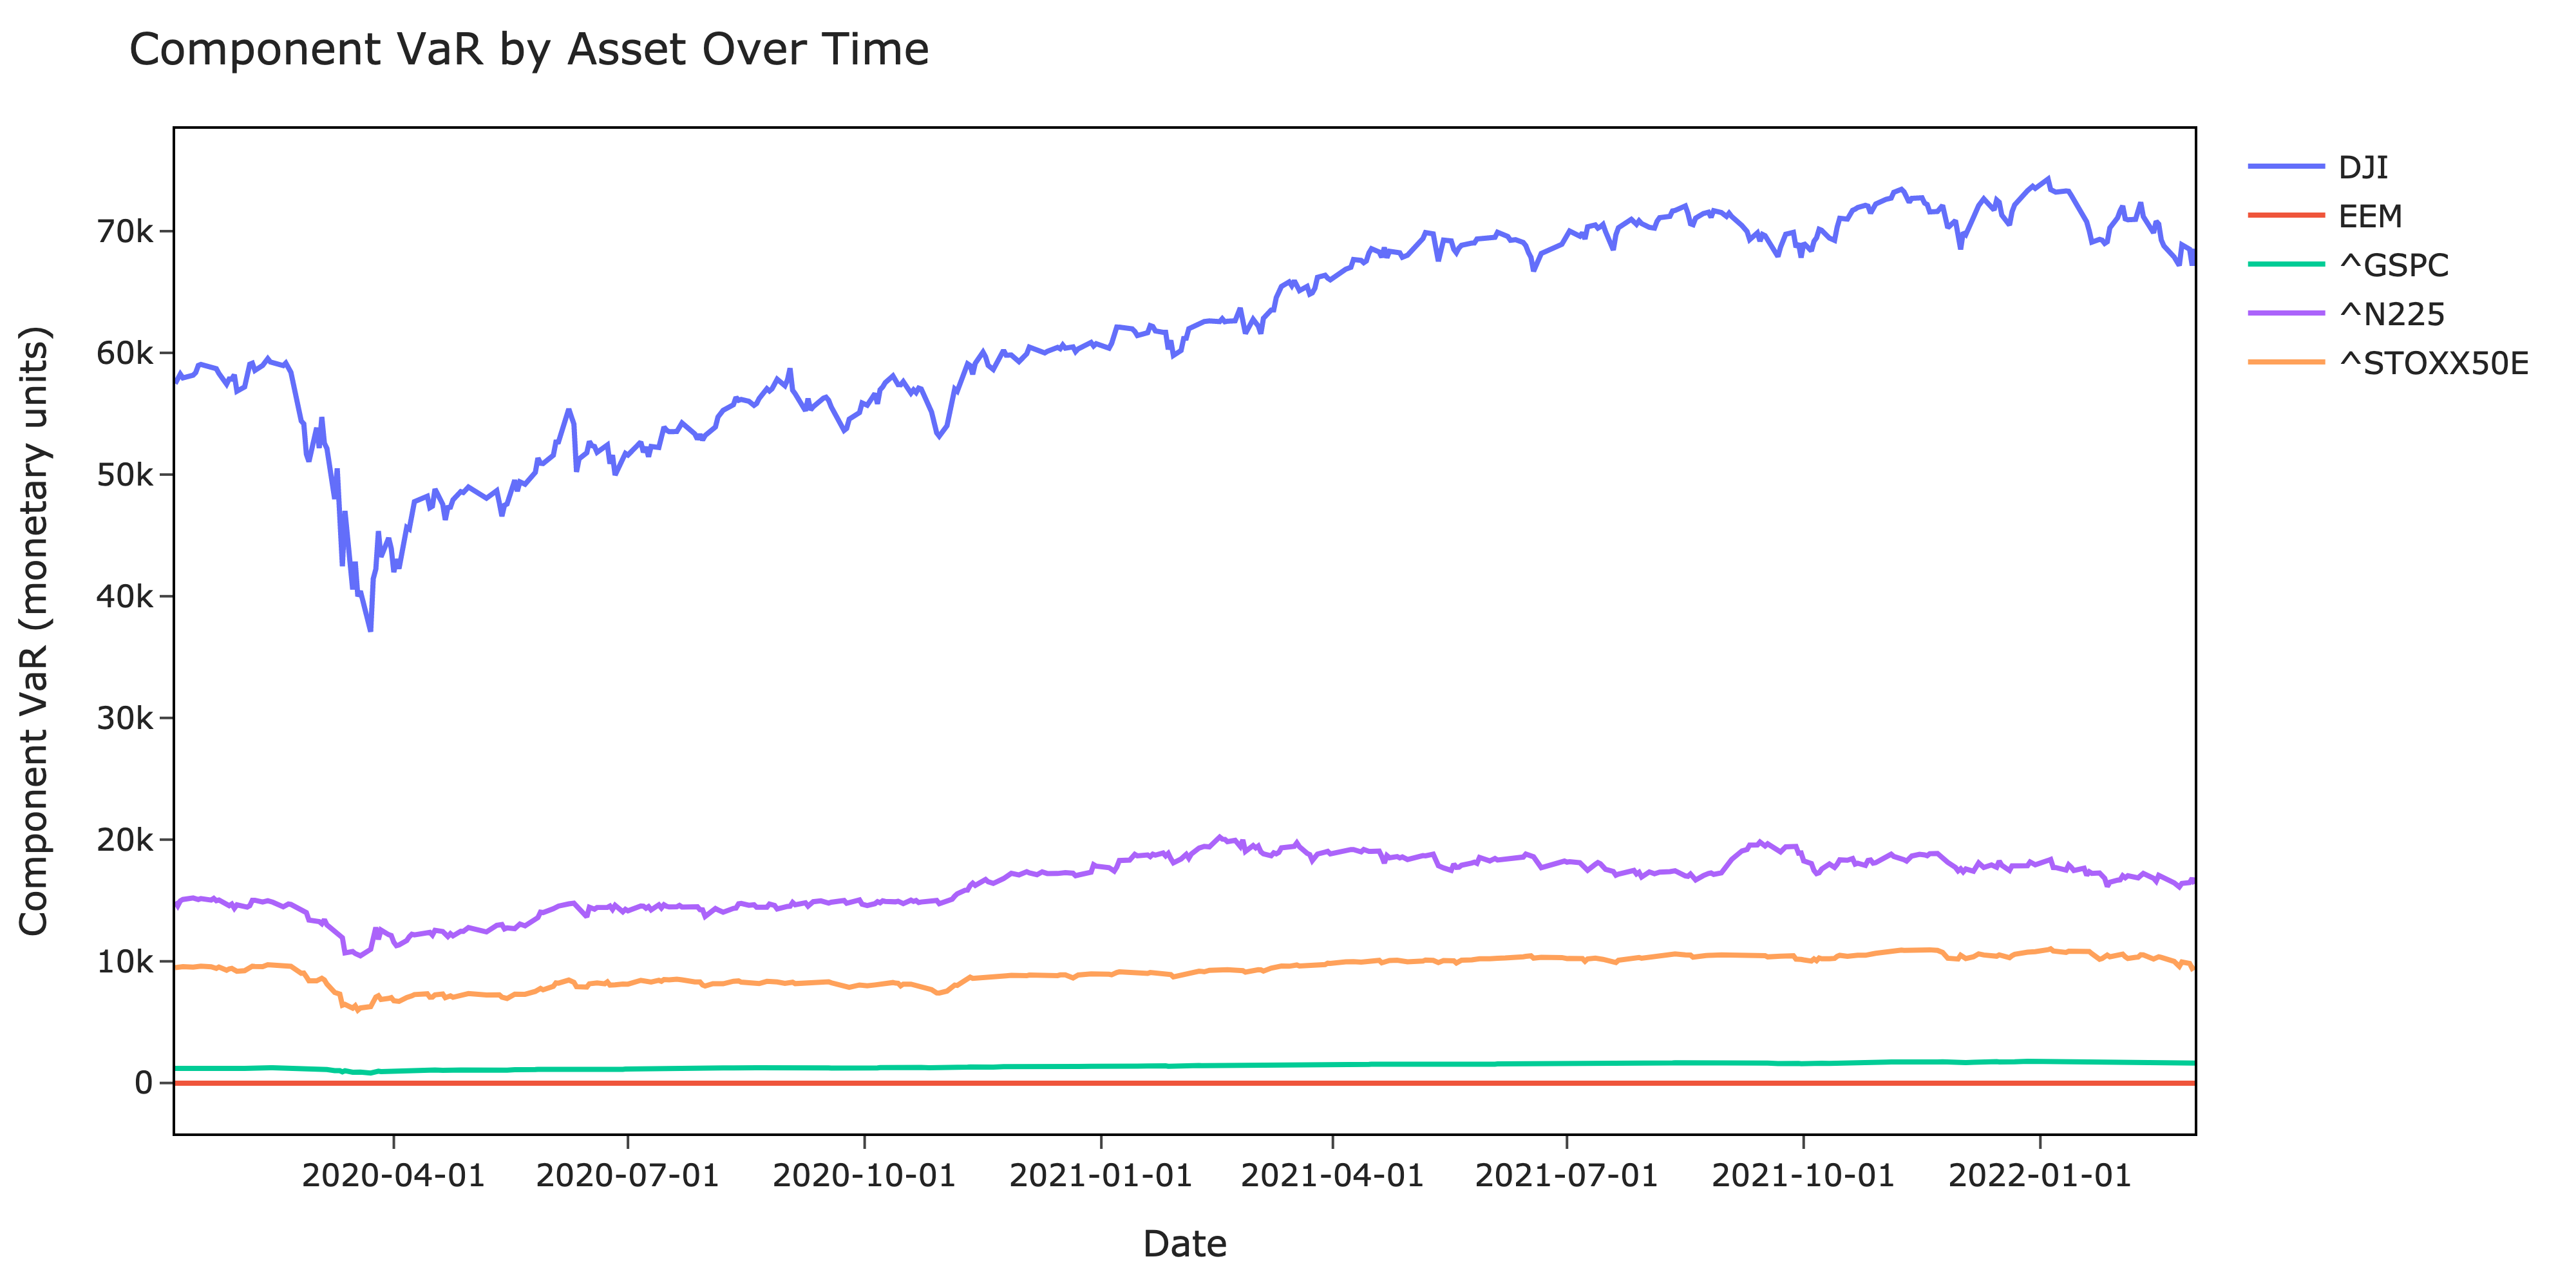

In [ ]:
pl.plot_risk_contribution_lines(component_df, interactive=False)


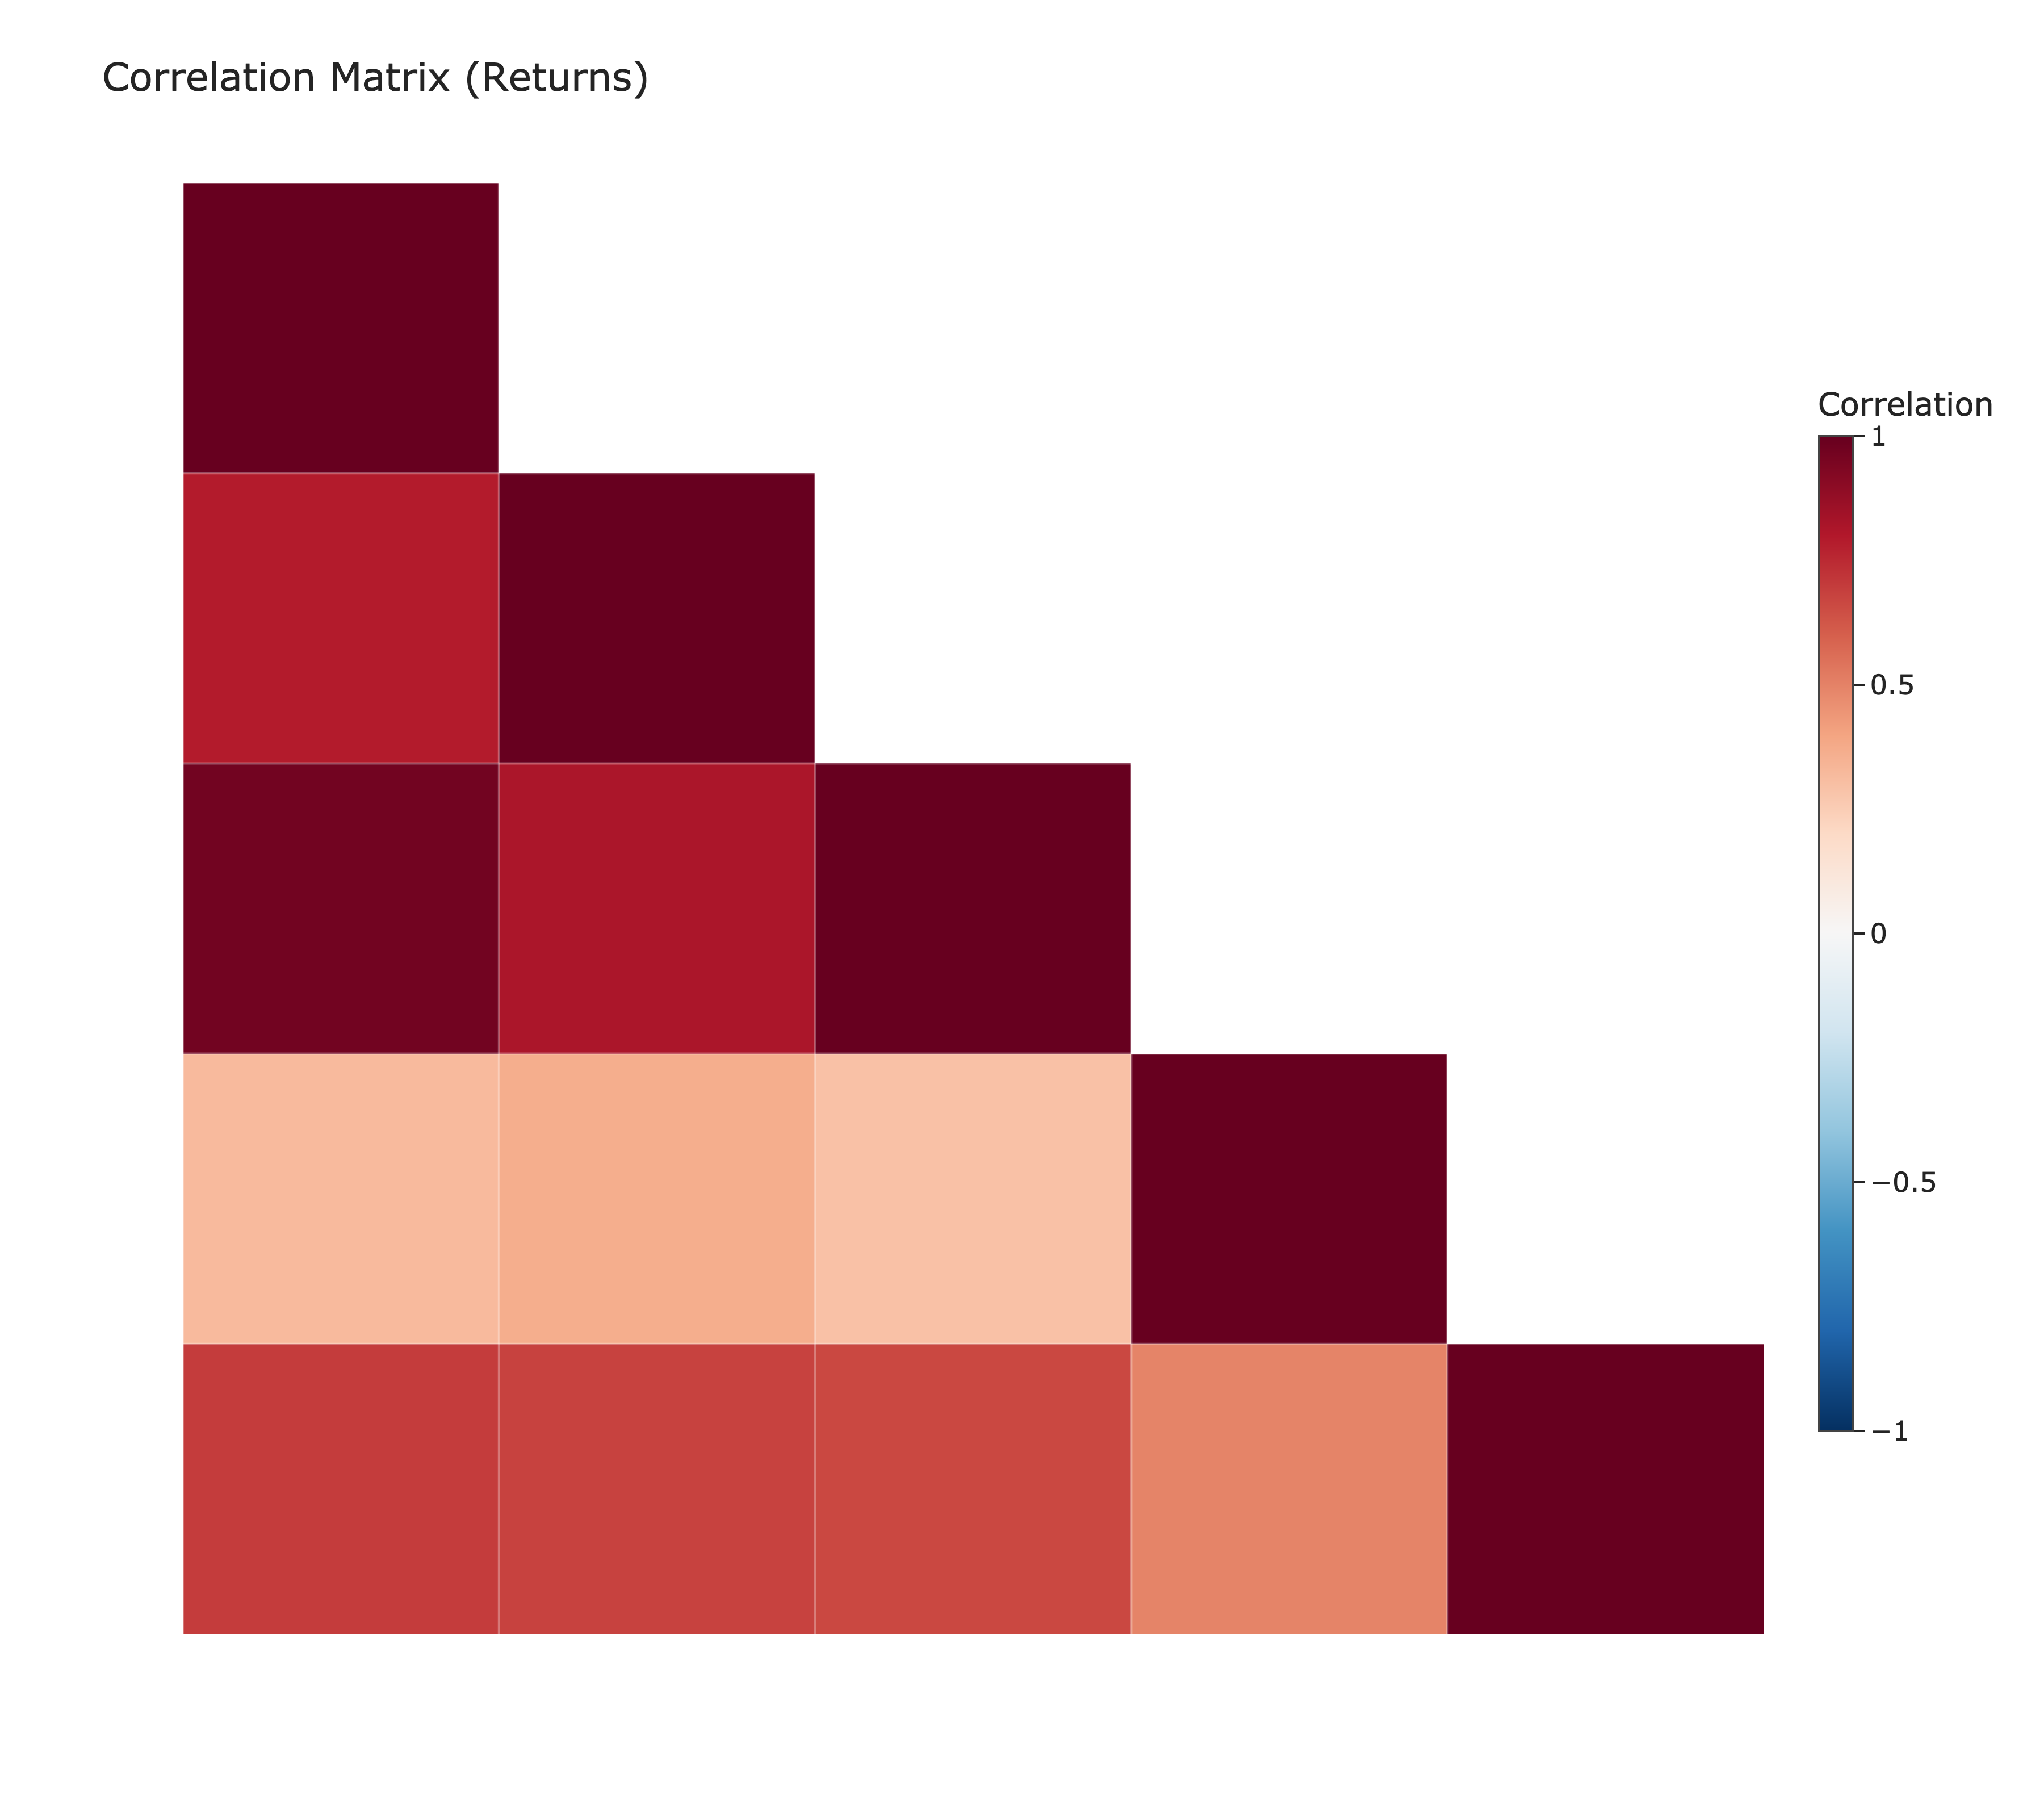

In [ ]:
pl.plot_correlation_matrix(position_data, interactive=False)

---
### Appendix

- **Asset-Normal VaR (AN VaR)**  
  $$
  \text{VaR}_t = z_\alpha \cdot \sqrt{x_t^\top \Sigma x_t} \cdot \sqrt{h}
  $$

- **Undiversified VaR (UVaR)**  
  $$
  \text{UVaR}_t = z_\alpha \cdot \sum_{i=1}^N \sigma_i x_{i,t} \cdot \sqrt{h}
  $$

- **Marginal VaR**  
  $$
  \Delta \text{VaR}_{i,t} = \text{VaR}_t \cdot \frac{(\Sigma x_t)_i}{x_t^\top \Sigma x_t}
  $$

- **Component VaR**  
  $$
  \text{CVaR}_{i,t} = x_{i,t} \cdot \Delta \text{VaR}_{i,t}
  $$

- **Relative Component VaR**  
  $$
  \text{RCVaR}_{i,t} = \frac{\text{CVaR}_{i,t}}{\text{VaR}_t}
  $$

- **Incremental VaR**  
  $$
  \text{IVaR}_t = \Delta \text{VaR}_t^\top \cdot a
  $$

---

### Function Dependencies

```text
var_asset_normal()
 └── marginal_var()
      ├── component_var()
      │     └── relative_component_var()
      └── incremental_var()
```

---

### Notes
- All risk measures are in **monetary terms**.
- Covariance is based on returns inferred from time series of holdings.
- Inputs: matrix of monetary holdings, confidence level $z_\alpha$, and horizon $h$.